Bude zlobit "právní".

In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/05/25 15:03:01 z 4532 filmů odstraněno 125. Aktuální dataframe obsahuje 4407 filmů.


In [2]:
import re

In [3]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/05/25 15:03:05 z 86651 filmů odstraněno 1199. Aktuální dataframe obsahuje 85452 filmů.


In [4]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86647,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86648,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86649,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [5]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [6]:
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")
df = df[df["Hrají"] != "neuvedeno"]

## Obecná data

In [7]:
len(herectvo["Jméno"].drop_duplicates().to_list())

11617

In [8]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [9]:
len(zijici)

2926

In [10]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [11]:
len(veskere_herectvo)

36934

In [12]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [13]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.00
0.333     1.00
0.500     1.00
0.667     3.00
0.750     4.00
0.900    15.00
0.950    30.00
0.990    74.84
Name: Obsazovanost, dtype: float64

In [14]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [15]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     2.0
0.900     4.0
0.950     9.0
0.990    41.0
Name: Obsazovanost 2, dtype: float64

In [16]:
q = obsazovanost2.quantile(0.95)
q

9.0

In [17]:
q2 = obsazovanost2.quantile(0.98)
q2

24.0

## Nejdelší a nejplodnější kariéry

In [18]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [19]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [20]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [21]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Zasloužilý umělec,Národní umělec,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Polední výstřel na Mariánských hradbách (401709),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cvičení s kužely Sokolů malostranských (401704),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyklisté (401705),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Defilování vojska o Božím těle na Královských ...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanácké banderium (401707),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137861,NaN,NaN,NaN,Alexandra Sasínová (9996),9996,,fyzická,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN
137862,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právnická,plutoon,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN
137863,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právnická,plutoon,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN
137864,NaN,NaN,NaN,Čechomor (person),person,None,právnická,None,None,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN


In [22]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

In [23]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Karel Dvořák                   82.0
Jiří Klečka                    82.0
Jiřina Bohdalová (2878)        79.0
None                           79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Černý                          73.0
Name: Délka kariéry, dtype: float64

In [24]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Karel Dvořák                   82.0
None                           79.0
Jiřina Bohdalová (2878)        79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Černý                          73.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [25]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        276
Theodor Pištěk (37366)         251
Eman Fiala (64088)             211
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         167
Oldřich Velen (12725)          166
Milka Balek-Brodská (28799)    163
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [26]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       20
Theodor Pištěk (37366)   1938.0       20
Jan W. Speerger (55928)  1938.0       19
Theodor Pištěk (37366)   1937.0       19
Jaroslav Marvan (9550)   1938.0       18
Name: Film, dtype: int64

In [27]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [28]:
nejaktivnejsich500 = hraji.groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()

In [29]:
nejaktivnejsich500

['Jan W. Speerger (55928)',
 'Theodor Pištěk (37366)',
 'Eman Fiala (64088)',
 'Jaroslav Marvan (9550)',
 'František Filipovský (4735)',
 'Alois Dvorský (127491)',
 'Oldřich Velen (12725)',
 'Milka Balek-Brodská (28799)',
 'Josef Kemr (4897)',
 'Jaroslav Tomsa (2576)',
 'Václav Trégl (35224)',
 'Vladimír Hlavatý (34999)',
 'Josef Hlinomaz (26212)',
 'Karel Hovorka (76534)',
 'Vladimír Řepa (127334)',
 'Jiří Lír (4926)',
 'Vladimír Menšík (126036)',
 'F. X. Mlejnek (128287)',
 'Karel Augusta (5058)',
 'František Kreuzmann (75624)',
 'Vladimír Navrátil (12670)',
 'Lubomír Kostelka (841)',
 'Bohuš Záhorský (53346)',
 'Mirko Musil (33555)',
 'Ota Motyčka (81341)',
 'Jindřich Plachta (5829)',
 'Rudolf Hrušínský st. (4842)',
 'Josef Somr (1054)',
 'Vlastimil Brodský (833)',
 'Jan Kuželka (1445)',
 'Jiřina Bílá (3629)',
 'Miloš Kopecký (4959)',
 'Václav Kotva (2718)',
 'Zdeněk Srstka (7960)',
 'Ella Nollová (127319)',
 'Hermína Vojtová (127041)',
 'Jaroslav Vojta (77195)',
 'Karel Engel (1439

<AxesSubplot:xlabel='Copyright'>

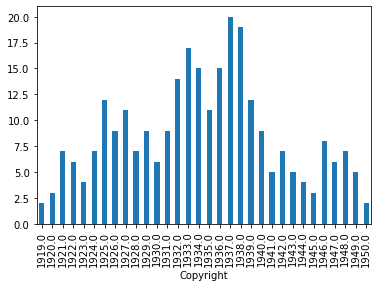

In [30]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [31]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            115
Jiří Lábus (838)              100
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Ondřej Vetchý (836)            74
Name: Film, dtype: int64

In [32]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
23709,1937.0,Pižla a Žižla na cestách (395752),6.0
23710,1939.0,Zlatý člověk (395859),8.0
23711,1940.0,Babička (395928),9.0
23712,1940.0,Dceruška k pohledání (395926),9.0
23713,1940.0,Madla zpívá Evropě (395922),9.0
23714,1947.0,Muzikant (396045),16.0
23715,1952.0,Únos (396149),21.0
23716,1955.0,Direktiva (396228),24.0
23717,1955.0,Něco se tu změnilo (396202),24.0
23722,1956.0,Vina Vladimíra Olmera (396248),25.0


## Další rekordy

In [33]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [34]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [35]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         40
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Slávka Hamouzová (84688)     34
Bohdan Lachman (128508)      33
Name: Film, dtype: int64

In [36]:
hraji[hraji["Věk"] >= 80].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josefa Pechlátová (126344)    15
Marie Rosůlková (4751)        12
František Kovářík (126912)    11
Antonín Soukup (87404)        10
Stanislav Zindulka (835)      10
Vlastimila Vlková (27109)     10
Jan Skopeček (8252)            9
Lubomír Lipský (9728)          9
Alois Dvorský (127491)         8
Antonín Zacpal (27111)         8
Name: Film, dtype: int64

## Kolegové

In [37]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [38]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [39]:
len(kolegove("Jiřina Bohdalová (2878)"))

1793

## Červí díry

In [40]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [41]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

[None,
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [42]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo = [p for p in posledni_herectvo if p != "neuvedeno"]
posledni_herectvo

[None,
 'Marie Novotná',
 'Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Jiří Navrátil',
 'Jan Martínek',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Václav Černý',
 'Taťjana Medvecká (7064)',
 'Boleslav Polívka (1556)',
 'Luděk Sobota (15687)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Marie Čápová',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Václav Vydra nejml. (2666)',
 'Josef Lébr',
 'Jiří Lábus (838)',
 'Alois Švehlík (6277)',
 'Zuzana Bydžovská (4683)',
 'Jiří Balvín',
 'Otakar Brousek ml. (2989)',
 'Jan Pospíšil',
 'Milan Šteindler (1572)',
 'František Ringo Čech (11726)',
 'Uršula Kluková (12475)',
 'Vlasta Žehrová (2776)',
 'Rostislav Novák st. (40328)',
 'Tomáš Jirsa',
 'Daniela Vacková (27460)',
 'Tomáš Hanák (198)',
 'Vlastimil Venclík (27245)',
 'Petr Drozda (1502)',
 'Miroslav Donutil (7954)',
 'Pavel Zatloukal (1580)',
 'Vladimír Hauser (12684)',
 'Martin Havelka (28167)'

In [43]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    if n:
        if "(" in n:
            spolu = kolegove(n)
            for x in prvni_herectvo:
                if x:
                    if "(" in x:
                        if x in spolu:
                            for y in posledni_herectvo:
                                if y:
                                    if "(" in y:
                                        if y in spolu:
                                            print(f"{n}, {x}, {y}")
                                            n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                                            y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                                            z_filmy = []
                                            for nf in n_filmy:
                                                if nf in y_filmy:
                                                    z_filmy.append(nf)
                                                    cervi_filmy.append(nf)
                                            print(z_filmy)
                                            print("***")
                                            cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

Zdeněk Štěpánek (87457), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Znamení Raka (396675)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Noc na Karlštejně (396999)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Spadla s měsíce (396439)', 'Světáci (396816)', 'Ďábelské líbánky (396879)', 'Hodíme se k sobě, miláčku...? (397038)', '„Marečku, podejte mi pero!“ (397112)', 'Zítra to roztočíme, drahoušku...! (397104)', '„Já to tedy beru, šéfe...!“ (397161)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Zdeněk Dušek (993)
['Jak se kalí ocel (396571)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Tři chlapi na cestách (396984)']
***
Darja Hajská (35228), Josef Šváb-Malostranský (55291), Miroslav Vladyka (513)
['Brácha za všechny peníze (397

In [44]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'Antonín Meisner (127732)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'Marta Májová (127723)',
 'Václav Vydra ml. (126535)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',


In [45]:
cervi_diry_seznam = list(set(cervi_diry))

In [46]:
len(cervi_diry_seznam)

25

In [47]:
cervi_diry_statistiky = {}
for c in cervi_diry:
    cervi_diry_statistiky[c] = cervi_diry.count(c)
cervi_diry_statistiky = pd.DataFrame.from_dict(cervi_diry_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_diry_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Vladimír Hlavatý (34999),27
Ela Šárková (126039),14
Darja Hajská (35228),12
František Kovářík (126912),10
Jára Kohout (4846),7
Ela Poznerová (126572),5
Gabriela Bártlová-Buddeusová (127814),4
L. H. Struna (126711),4
Eman Fiala (64088),3
Nataša Gollová (36491),3


In [48]:
cervi_filmy_statistiky = {}
for c in cervi_filmy:
    cervi_filmy_statistiky[c] = cervi_filmy.count(c)
cervi_filmy_statistiky = pd.DataFrame.from_dict(cervi_filmy_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_filmy_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Přátelé bermudského trojúhelníku (397557),10
Zelená vlna (397382),7
Velká filmová loupež (397520),7
"„Marečku, podejte mi pero!“ (397112)",6
Divoké pivo (8405),5
Čintamani & podvodník (396606),4
Hodinářova svatební cesta korálovým mořem (397250),4
Ďábelské líbánky (396879),4
Srdečný pozdrav ze zeměkoule (397365),4
Zralé víno (397335),4


In [49]:
cervi_diry_ciste = []
for c in cervi_diry_seznam:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

Jaroslav Marvan, Václav Vydra ml., Ela Šárková, Bedřich Vrbský, Zdeněk Štěpánek, Jarmila Kronbauerová, Josef Steigl, Ela Poznerová, Frank Argus, František Kovářík, Anna Gabrielová, Slávka Doležalová-Kulhavá, Darja Hajská, Marie Nademlejnská, Václav Wasserman, Světla Svozilová, Marta Májová, Gabriela Bártlová-Buddeusová, Eman Fiala, Alois Dvorský, Nataša Gollová, Antonín Meisner, L. H. Struna, Jára Kohout, Vladimír Hlavatý


In [50]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

Copyright
1916.0    1966.0
1918.0    1975.0
1924.0    1975.0
1919.0    1980.0
1920.0    1980.0
           ...  
1961.0    1996.0
1957.0    1996.0
1956.0    1996.0
1936.0    1996.0
1939.0    1996.0
Name: Rok úmrtí, Length: 76, dtype: float64

## Nejvíc oskarových filmů

In [51]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [52]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)      1
Alois Vachek (130102)      1
Alojz Kramár               1
Andrej Chalimon (37311)    1
Andrej Šilan (59766)       1
Name: Film, dtype: int64

In [53]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Antonín Blažejovský         2
Jan Tříska (4834)           2
Name: Film, dtype: int64

In [54]:
df[(df["Film"].isin(seznamy["oskarianominace"]) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
1976,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,[Miloš Forman (7872)],film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",[Ivan Passer (7890)],None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",[Václav Šašek (1766)],[Miroslav Ondříček (3524)],[Rudolf Blaháček (14330)],[Karel Černý (1241)],None,[Rudolf Hammer (5119)],[Miroslav Hájek (54607)],[Adolf Böhm (126000)],None,[Rudolf Hájek (12756)],"[Jaroslav Solnička (85467), Otakar Jiříček]",None,[27434],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],"[Ústřední půjčovna filmů (106116), Národní fil...",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",[Miloš Forman (7872)],None,None,None,None,None,None,[6661],None,2195.0,None,[Vítěz Akce: Anketa filmových kritiků o nejlep...,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[2852, 22453, 8166, 7217, 129618, 2858, 2930, ...",None,None,"[Vladimír Mácha (127847), Vladimír Mácha, Rudo...","[Pavla Marková (36607), Jaromír Komárek (22275...",None,None,[Ladislav Chroust (59307)],None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...","[Jindřich Brabec (5311), Vokální soubor Lubomí...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,[Miloš Červinka (31108)],None,None,[Jaroslav Vlk (130440)],[Lilian Havlíčková (66986)],"[Zdena Šnajdarová (31117), Emilie Fišarová (20...",[Jitka Šulcová (129636)],None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222..."

## Hlavní a vedlejší role

In [55]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [56]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [57]:
hvezdy

,Hvězdnost,Obsazovanost
100597,NaN,NaN
101659,NaN,NaN
101660,NaN,NaN
108376,NaN,NaN
110277,NaN,NaN
...,...,...
Jolana Smyčková (3488),NaN,1.0
Lux Rodenberg (105625),NaN,1.0
Peter Dvorský (23426),NaN,1.0
Walter Gussmann (109516),NaN,1.0


In [58]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.970588,35.0
Suzanne Marwille (127373),0.900000,37.0
Rolf Wanka (56226),0.846154,12.0
Jaroslav Vízner (27247),0.777778,9.0
Růžena Nasková (127316),0.769231,13.0
Juraj Kukura (9694),0.769231,13.0
Hugo Haas (37289),0.766667,30.0
Jan Werich (1287),0.761905,21.0
Anny Ondráková (127280),0.735294,32.0
Anna Geislerová (5433),0.702703,39.0


In [59]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

50
Vlasta Burian, Suzanne Marwille, Rolf Wanka, Jaroslav Vízner, Růžena Nasková, Juraj Kukura, Hugo Haas, Jan Werich, Anny Ondráková, Anna Geislerová, V. Ch. Vladimírov, Veronika Renčová, Karel Lamač, Josef Filip, Karel Höger, Karel Roden nejml., Lexa Jarošín, Július Pántik, Václav Norman, Lída Baarová, Jana Brejchová, Jan Dolanský, Zdeněk Štěpánek, Oldřich Nový, Hana Vítová, Vlasta Matulová, Gustáv Valach, Tatiana Vilhelmová, Leopolda Dostalová, Tomáš Holý, Karel Hašler, Magda Vášáryová, Jiří Mádl, Vojtěch Kotek, Eva Gerová, Jiří Vala, Klára Issová, Božidara Turzonovová, Erik Pardus, Ivan Trojan, Eduard Cupák, Jaromír Hanzlík, Otomar Korbelář, David Prachař, Josef Šebánek, Jiřina Švorcová, Václav Voska, Žaneta Fuchsová, Ondřej Sokol, Ladislav Brom


In [60]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by=["Hvězdnost","Obsazovanost"], ascending=False).head(50)

,Hvězdnost,Obsazovanost
Juraj Kukura (9694),0.769231,13.0
Anna Geislerová (5433),0.702703,39.0
Veronika Renčová (128659),0.700000,10.0
Josef Filip (127149),0.692308,13.0
Karel Roden nejml. (494),0.679245,54.0
Jana Brejchová (7710),0.650000,60.0
Jan Dolanský (1091),0.647059,18.0
Tatiana Vilhelmová (935),0.606061,34.0
Magda Vášáryová (31019),0.600000,15.0
Jiří Mádl (18965),0.592593,27.0


In [61]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [62]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [63]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,136.0
Vladimír Navrátil (12670),NaN,125.0
Jan Kuželka (1445),NaN,116.0
Jiřina Bílá (3629),NaN,115.0
Zdeněk Srstka (7960),NaN,108.0
Karel Bělohradský (6370),NaN,99.0
Jindřich Narenta (87097),NaN,96.0
Jan Cmíral (125562),NaN,96.0
Zdeněk Skalický (126510),NaN,93.0
Emanuel Hříbal (127758),NaN,92.0


In [64]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(600, 2)

In [65]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,151.0
Karel Engel (14390),0.009174,94.0
Josef Oliak (128024),0.010870,90.0
Alois Dvorský (127491),0.011976,168.0
Karel Pavlík (126439),0.012658,81.0
Miloslav Homola (18975),0.012821,77.0
Vlastimila Vlková (27109),0.013333,75.0
Viktor Maurer (78076),0.013889,75.0
F. X. Mlejnek (128287),0.015625,103.0
Karel Augusta (5058),0.015625,128.0


In [66]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [67]:
df = df.explode("Žánr")

In [68]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [69]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [70]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [71]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost'],
      dtype='object')

In [72]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
anekdota: Hrají
Antonín Kachlík (7880)    1
Name: Film, dtype: int64
komedie: Hrají
Theodor Pištěk (37366)    115
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    46
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka 

In [73]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

fraška
Hrají
Josef Waltner (126405)             0.138889
Ada Karlovský (85828)              0.131579
Jindřich Adolf (13279)             0.125000
Alfred Baštýř (28814)              0.114286
Josef Sládek (18352)               0.111111
Mario Karas (101579)               0.096774
František Beranský (49046)         0.090909
Josef Rovenský (37766)             0.088235
Karel Němec (128590)               0.084746
Josef Šváb-Malostranský (55291)    0.082192
dtype: float64
***
anekdota
Hrají
Jan Víšek (4757)             0.037037
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.029412
Ilona Jirotková (126679)     0.027027
Tomáš Hanák (198)            0.025641
Jiřina Šejbalová (125559)    0.023256
František Kubíček (87096)    0.020833
Pavel Landovský (1136)       0.020000
Marta Richterová (27358)     0.019608
Jiřina Jirásková (22836)     0.018182
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)        0.828571
Hugo Haas (37289)            0.800000
Jára Kohout (4846)      

detektivní
Hrají
Božena Böhmová (27878)                   0.166667
Miloš Willig (82925)                     0.145455
Bohumil Šmída (31114)                    0.127660
Václav Wasserman (37326)                 0.121212
Vladimír Ptáček (126428)                 0.116279
Anna Gabrielová (4949)                   0.115385
Jiří Němeček (4964)                      0.109589
Gabriela Bártlová-Buddeusová (127814)    0.109091
Jan Maška (126431)                       0.108108
Jana Sedlmajerová (123233)               0.107143
dtype: float64
***
trikový
Hrají
Jaromír Nosek (585)         0.038462
Nela Boudová (8226)         0.037037
Pavel Liška (984)           0.037037
Arnošt Goldflam (1579)      0.031250
Jarka Pižla (128001)        0.031250
Jan Vondráček (1713)        0.028571
Miloslav Holub (5166)       0.027778
Jan Budař (11090)           0.026316
František Šlégr (127637)    0.022727
Jan Hrušínský (9926)        0.021739
dtype: float64
***
sociální
Hrají
Frank Rose-Růžička (127740)    0.083333
Oleg R

dětský
Hrají
Otto Šimánek (35353)         0.308824
Stanislav Tříska (4976)      0.300000
Michael Hofbauer (13613)     0.291667
Václav Babka (28480)         0.220000
Filip Renč (558)             0.200000
Karel Smyczek (611)          0.200000
Otakar Brousek ml. (2989)    0.200000
Pavlína Mourková (2667)      0.200000
Václav Halama (21254)        0.185185
Ilona Kubásková (126473)     0.166667
dtype: float64
***
rodinný
Hrají
Hynek Čermák (3370)         0.115385
Matěj Hádek (11532)         0.107143
Marek Taclík (9420)         0.096774
Naďa Konvalinková (4988)    0.083333
Jana Štěpánková (14419)     0.078947
Ivan Trojan (6789)          0.076923
Jaroslava Pokorná (2727)    0.076923
Karel Dobrý (6362)          0.076923
Nela Boudová (8226)         0.074074
Pavel Nový (510)            0.070423
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)          0.119048
Oskar Hák (7589)              0.114286
Bert Schneider (126653)       0.103448
Marie Popelková (35279)       0.068966
Miloslav Svobod

reportáž
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Abdelhafidh Bouassida (54108)   NaN
dtype: float64
***
erotický
Hrají
Jiří Pomeje (3876)           0.125000
Oldřich Vízner (8257)        0.062500
Václav Knop (12652)          0.041667
Blanka Lormanová (14388)     0.040000
Dana Syslová (52427)         0.040000
Hanuš Bor (7070)             0.038462
Jaromír Nosek (585)          0.038462
Nela Boudová (8226)          0.037037
Ondřej Pavelka (6299)        0.034483
Bronislav Poloczek (2877)    0.028571
dtype: float64
***
milostný
Hrají
Kryštof Hádek (1830)      0.117647
Ondřej Malý (59148)       0.083333
Anna Geislerová (5433)    0.076923
Hanuš Bor (7070)          0.076923
Jiří Mádl (18965)         0.074074
Le

výukový
Hrají
Pavel Liška (984)                0.037037
A. M. Brousil (127207)                NaN
A. Pahl (21791)                       NaN
A. Pokorný (21836)                    NaN
A. Ryzák (19930)                      NaN
A. V. Frič (104959)                   NaN
A. V. Jarol-Jarolímek (51927)         NaN
A. Černá (44606)                      NaN
Aanshal Batnagar (36659)              NaN
Aaron Monaghan (59068)                NaN
dtype: float64
***
medailon
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)                NaN
A. V. Frič (104959)             NaN
A. V. Jarol-Jarolímek (51927)   NaN
A. Černá (44606)                NaN
Aanshal Batnagar (36659)        NaN
Aaron Monaghan (59068)          NaN
Abdelhafidh Bouassida (54108)   NaN
dtype: float64
***
videoklip
Hrají
A. M. Brousil (127207)          NaN
A. Pahl (21791)                 NaN
A. Pokorný (21836)              NaN
A. Ryzák (19930)             

In [74]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

Hrají
František Filipovský (4735)    38
Jaroslav Tomsa (2576)          38
Josef Kemr (4897)              38
Josef Hlinomaz (26212)         37
Eman Fiala (64088)             34
Name: Žánr, dtype: int64

In [75]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()

Hlavní role
Karel Roden nejml. (494)       23
Miloš Kopecký (4959)           22
Jana Brejchová (7710)          21
Rudolf Hrušínský st. (4842)    21
Iva Janžurová (1049)           20
Name: Žánr, dtype: int64